<a href="https://colab.research.google.com/github/suryakanthPS/DS-Workbooks/blob/main/0619_linear_regression_news_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data Set

In [ ]:
import pandas as pd
data = pd.read_csv("/content/NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


# Correlation Timestamp - 11:52

In [ ]:
#for every 1 daily circulation there is 0.95 sunday circulation
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


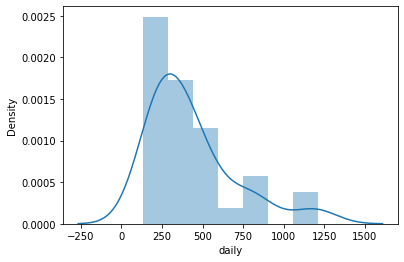

In [ ]:
import seaborn as sns
sns.distplot(data['daily'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


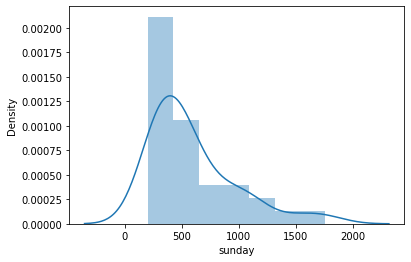

In [ ]:
import seaborn as sns
sns.distplot(data['sunday'])

In [ ]:
#11:56 the curve which we get there is a normal distribution curve 
#the highest point is the mean and the curve is skewed to both sides thats y we get -250 values

Fitting a Linear Regression Model Time stamp - 11:53

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()
#ols - ordinary least squares
#sunday~daily comparing two data 

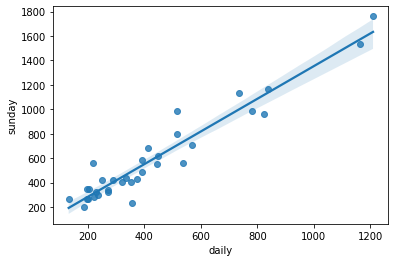

In [ ]:
sns.regplot(x="daily", y="sunday", data=data);
#sns - seaborn
#regplot - regression plot it gives the regression line

In [ ]:
#Coefficients
model.params
#y=mx+c ; daily=m ; intercept=c

Intercept    13.835630
daily         1.339715
dtype: float64

In [ ]:
#t and p-Values
#t means tdistribution value
#p value is probability value
print(model.tvalues, '\n', model.pvalues)    

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)
#higer the r^2 value higher the correlation
#lower the r^2 value lower the correlation

(0.9180596895873295, 0.9154990548869336)

# Predict for new data point - Time stamp - 12:06

In [ ]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([299,300,301,302,303])

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [ ]:
model.predict(data_pred)

0    414.410342
1    415.750057
2    417.089772
3    418.429487
4    419.769201
dtype: float64

In [ ]:
#Time stamp 12:08

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           6.02e-19
Time:                        09:34:35   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#from result its not much skewed but heavily kurtosis 

In [ ]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.915   
Dependent Variable: sunday           AIC:                417.7005
Date:               2022-08-26 09:25 BIC:                420.7532
No. Observations:   34               Log-Likelihood:     -206.85 
Df Model:           1                F-statistic:        358.5   
Df Residuals:       32               Prob (F-statistic): 6.02e-19
R-squared:          0.918            Scale:              11973.  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept    13.8356   35.8040   0.3864  0.7017  -59.0947  86.7660
daily         1.3397    0.0708  18.9348  0.0000    1.1956   1.4838
-----------------------------------------------------------------
Omnibus:              3.297        Durbin-Watson:           2.059
Prob(Omnibus):        0.192        Jarque-Bera (JB):        1.990
Skew:                 0.396        Prob(JB):                0.370
Kurtosis:             3.882        Condition No.:           965  
=================================================================

"""

# real time example

he starts to do a siemens modal right from scratch. Its clean and clear

*   12:20 - Datapreprocessing

*   12:26 - fitting the modal
*   12.42 - Visualization

